In [1]:
import os, sys
import scipy.stats
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
mpl.style.use('default')
import time
import imp
import spatialstatWUCCI.distribution_simulator as sswdistsim

path = '/Users/michaelshih/Documents/code/personal_project/Ripleys_K_function_test/'
os.chdir(path)
outputfolder = 'output'
outputsubfolder_csv = 'csv'
outputsubfolder_figure = 'figure'

%load_ext autoreload
%autoreload 2

In [2]:
print(path)

/Users/michaelshih/Documents/code/personal_project/Ripleys_K_function_test/


In [3]:
# Part 1: generating simulated data points ---------------------------------
# 1-1 generated a <Nx2> array by ThomasPP
# creating parent points
seed = 1219

rate = 0.1
Dx = 256
P_parent = sswdistsim.PoissonPP(rt = rate, seed = seed)
print(P_parent)


[[ 9.29972003  3.83625438]
 [14.31440466  9.86109694]
 [19.82756649 10.94629638]
 [ 2.15846155 17.46160291]
 [13.61464706 19.03975767]
 [16.0423179  14.67559885]
 [ 1.36016217 18.10734791]
 [ 8.01234022  8.03426013]
 [16.82460101 13.12077605]
 [ 9.94762983 19.31823556]
 [ 8.69375407  3.41978922]
 [18.4614716   6.94756399]
 [18.88221912 11.60330466]
 [ 1.05905622  9.8948979 ]
 [16.20183204  3.30047318]
 [ 3.02536458  6.2210281 ]
 [10.28251888 18.4217387 ]
 [14.52690344  4.56150448]
 [ 7.73522446  6.78388678]
 [ 1.64799527 11.90850194]
 [19.28842805 19.63801237]
 [15.51377424 10.15548526]
 [18.64071041 14.36928897]
 [13.3153979   9.30218224]
 [14.17382395 10.88398836]
 [16.42829903  3.61890082]
 [ 1.37554131 12.50635838]
 [19.58204122 12.05862309]
 [10.80021954 10.14249764]
 [16.33953963 14.36178756]
 [ 8.36496788  9.79340978]
 [10.66013461 18.44792366]
 [15.80195229  3.64896311]
 [17.55813613  4.49165346]
 [ 8.76052955 13.34065893]
 [ 3.13058933  2.96481015]
 [18.05898927  7.67244429]
 

In [4]:
# creating children points
sigma = 0.3
mu = 50
P_children, P_parent = sswdistsim.ThomasPP(rt = rate,
                                sigma = sigma, mu = mu, seed = seed)
# reduce data to region of interest
xmin = 0 
xmax = Dx
ymin = 0
ymax = Dx

print(P_children)

[[9.83851182 3.82685342]
 [9.21226762 3.41909207]
 [9.60470338 4.15393052]
 ...
 [3.53133983 8.89616781]
 [3.66078525 8.33919646]
 [3.71713816 8.88132128]]


In [5]:
# crop data and calculate density
P_ThomasPP = sswdistsim.xyroi(P_children, xmin, xmax, ymin, ymax)
P_ThomasPP_density = sswdistsim.xydensity(P_ThomasPP) 

# print(P_ThomasPP.shape[0])
# print(P_ThomasPP_density)

# save to csv
filename = 'P_ThomasPP_20'
outputpath = os.path.join(path, outputfolder, outputsubfolder_csv, filename + '.csv')
df = pd.DataFrame(P_ThomasPP, columns = ['x', 'y']) 
df.to_csv(outputpath, index = False)

'''
# save metadata
outputpath = os.path.join(path, outputfolder, outputsubfolder_csv, filename + '.txt')
with open(outputpath, 'w') as file: 
    file.write('Filename: {}.csv\n'.format(filename))
    file.write('Counts: {}\n'.format(P_ThomasPP.shape[0]))
    file.write('Density {:.2f} (counts/area)\n'.format(P_ThomasPP_density))
    file.write('Data range in x-axis: {0} - {1}\n'.format(xmin, xmax))
    file.write('Data range in y-axis: {0} - {1}\n'.format(ymin, ymax))
    file.close()
'''

0 256 0 256


"\n# save metadata\noutputpath = os.path.join(path, outputfolder, outputsubfolder_csv, filename + '.txt')\nwith open(outputpath, 'w') as file: \n    file.write('Filename: {}.csv\n'.format(filename))\n    file.write('Counts: {}\n'.format(P_ThomasPP.shape[0]))\n    file.write('Density {:.2f} (counts/area)\n'.format(P_ThomasPP_density))\n    file.write('Data range in x-axis: {0} - {1}\n'.format(xmin, xmax))\n    file.write('Data range in y-axis: {0} - {1}\n'.format(ymin, ymax))\n    file.close()\n"

In [6]:
# 1-2 generated a <Nx2> array by PoissonPP
rate = 1
Dx = 20

# set data range
xmin = 0 
xmax = Dx
ymin = 0
ymax = Dx

P_PoissonPP = sswdistsim.PoissonPP(rt = rate, seed = seed)
# calculate density
P_PoissonPP_density = sswdistsim.xydensity(P_PoissonPP) 

In [8]:
print(path)

/Users/michaelshih/Documents/code/personal_project/Ripleys_K_function_test/


In [9]:
# save to csv
filename = 'P_PoissonPP_20'
outputpath = os.path.join(path, outputfolder, outputsubfolder_csv, filename + '.csv')
df = pd.DataFrame(P_PoissonPP, columns = ['x', 'y']) 
df.to_csv(outputpath, index = False)
# 1-3 generated a <Nx2> array by ThomasPP (dispersed)

In [ ]:
'''
# save metadata
outputpath = os.path.join(path, outputfolder, outputsubfolder_csv, filename + '.txt')
with open(outputpath, 'w') as file: 
    file.write('Filename: {}.csv\n'.format(filename))
    file.write('Counts: {}\n'.format(P_PoissonPP.shape[0]))
    file.write('Density {:.2f} (counts/area)\n'.format(P_PoissonPP_density))
    file.write('Data range in x-axis: {0} - {1}\n'.format(xmin, xmax))
    file.write('Data range in y-axis: {0} - {1}\n'.format(ymin, ymax))
    file.close()
'''

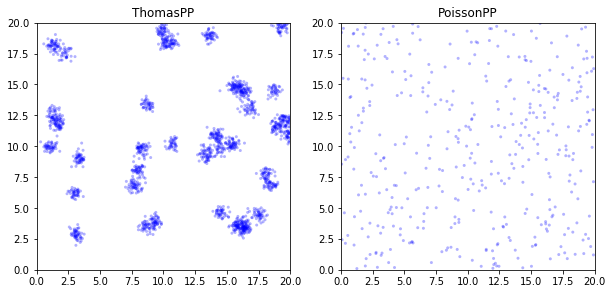

In [10]:
# Part 2: Ploting ------------------------------------------------------------
# set figure size
plt.figure(figsize= (10, 10))
plotsize_x = 20.0
plotsize_y = 20.0

# subplot 1
plot_1 = plt.subplot(221)
plot_1.scatter(P_children[:, 0], P_children[:, 1], 
                color = 'b', edgecolors = 'none', marker = '.', alpha =0.3)
plot_1.set_title('ThomasPP')
plot_1.set_xlim([0,20])
plot_1.set_ylim([0,20])

# subplot 2
plot_2 = plt.subplot(222)
plot_2.scatter(P_PoissonPP[:, 0], P_PoissonPP[:, 1], 
                color = 'b', edgecolors = 'none', marker = '.', alpha =0.3)
plot_2.set_title('PoissonPP')
plot_2.set_xlim([0,20])
plot_2.set_ylim([0,20])

# save figure
filename = 'Point_Process_20'
outputpath = os.path.join(path, outputfolder, outputsubfolder_figure, filename + '.png')
plt.savefig(outputpath)

plt.show()
